In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split 

In [4]:
train=pd.read_csv('D:/Sunil_M_S/Data Set/Food Demand Forecasting Data Set/train_GzS76OK/train.csv')
test=pd.read_csv('D:/Sunil_M_S/Data Set/Food Demand Forecasting Data Set/test_QoiMO9B.csv')

In [5]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [6]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [8]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [9]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [10]:
center_info=pd.read_csv('D:/Sunil_M_S/Data Set/Food Demand Forecasting Data Set/train_GzS76OK/fulfilment_center_info.csv')
meal_info=pd.read_csv('D:/Sunil_M_S/Data Set/Food Demand Forecasting Data Set/train_GzS76OK/meal_info.csv')

In [11]:
finaltrain=pd.merge(train,meal_info,on='meal_id',how='outer')
finaltrain=pd.merge(finaltrain,center_info,on='center_id',how='outer')

In [12]:
finaltrain.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [13]:
finaltrain=finaltrain.drop(['center_id','meal_id'],axis=1)


In [14]:
finaltrain.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [15]:
finaltrain.dtypes

id                         int64
week                       int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
dtype: object

In [16]:
cols=finaltrain.columns.tolist()
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [17]:
cols=cols[:2] + cols[9:] + cols[7:9] + cols[2:7]

In [18]:
print(cols)

['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


In [19]:
finaltrain.dtypes

id                         int64
week                       int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
lb1=LabelEncoder()
finaltrain['center_type']=lb1.fit_transform(finaltrain['center_type'])

lb2=LabelEncoder()
finaltrain['category']=lb2.fit_transform(finaltrain['category'])

lb3=LabelEncoder()
finaltrain['cuisine']=lb3.fit_transform(finaltrain['cuisine'])

In [22]:
finaltrain.dtypes

id                         int64
week                       int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
category                   int32
cuisine                    int32
city_code                  int64
region_code                int64
center_type                int32
op_area                  float64
dtype: object

# EDA

In [23]:
finaltrain.shape

(456548, 13)

In [24]:
import seaborn as sns

Text(0.5, 1.0, 'num_order distribution')

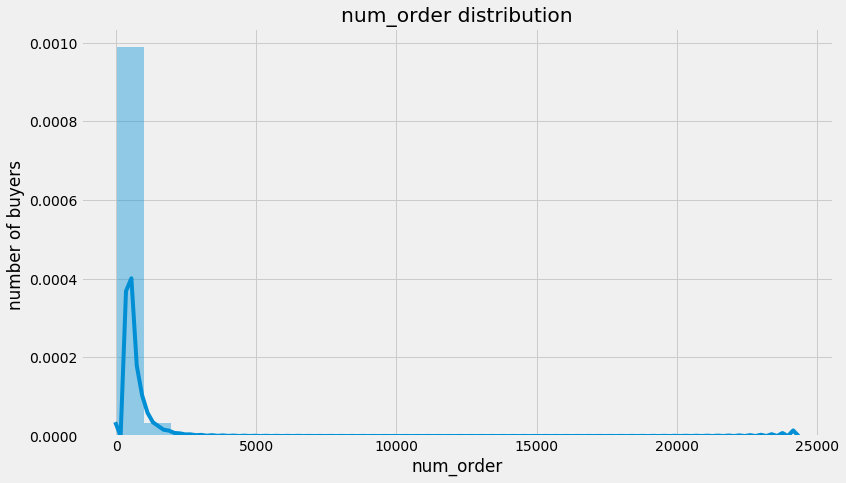

In [25]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(finaltrain.num_orders,bins=25)
plt.xlabel('num_order')
plt.ylabel('number of buyers ')
plt.title('num_order distribution')

In [26]:
def reciprocal(x):
    y=1/x
    return y

In [27]:
hehe=reciprocal(finaltrain.num_orders)

Text(0.5, 1.0, 'num_order of Distributions')

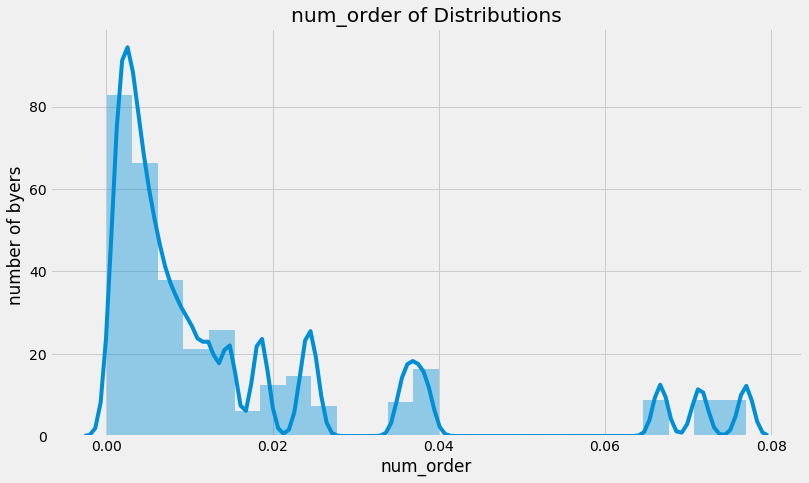

In [28]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(hehe,bins=25)
plt.xlabel('num_order')
plt.ylabel('number of byers ')
plt.title("num_order of Distributions")

In [29]:
finaltrain1=finaltrain.drop(['id'],axis=1)
correlation=finaltrain1.corr(method='pearson')
columns=correlation.nlargest(8,'num_orders').index

In [30]:
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

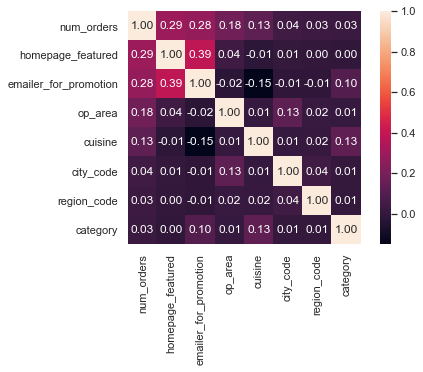

In [31]:

correlation_map = np.corrcoef(finaltrain1[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

# BASELINE ALGORITHM TEST

In [32]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [33]:

features = columns.drop(['num_orders'])
finaltrain3 = finaltrain[features]
X = finaltrain3.values
y = finaltrain['num_orders'].values

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [34]:
# liner regression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_val)
y_pred[y_pred<0]=0
from sklearn import metrics
print("RMSE:", 100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSE: 129.2343631967692


In [35]:
# pip install xgboost

In [36]:
# XGBoost 
from xgboost import XGBRegressor
xg=XGBRegressor()
xg.fit(X_train,y_train)
y_pred=xg.predict(X_val)
y_pred[y_pred<0]=0
from sklearn import metrics
print("RMSE:", 100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSE: 70.27610382107086


In [37]:
#LASSO
la=Lasso()
la.fit(X_train,y_train)
y_pred=la.predict(X_val)
y_pred[y_pred<0]=0
from sklearn import metrics
print("RMSE:", 100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSE: 128.90309390232758


In [38]:
# ELASTIC NET

en=ElasticNet()
en.fit(X_train,y_train)
y_pred=en.predict(X_val)
y_pred[y_pred<0]=0
from sklearn import metrics
print("RMSE:", 100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSE: 131.23685557416502


In [39]:
#decision Tree
tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)
y_pred=tree.predict(X_val)
y_pred[y_pred<0]=0
from sklearn import metrics
print("RMSE:", 100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSE: 63.03685686077657


In [43]:
tree.get_params

<bound method BaseEstimator.get_params of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')>

In [41]:
#KNN
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_val)
y_pred[y_pred<0]=0

from sklearn import metrics
print("RMSE:", 100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSE: 66.85028769441845


In [42]:
# #SVM
# from sklearn.svm import SVR
# svr=SVR(kernel='linear',C=100,gamma='auto')
# svr.fit(X_train,y_train)
# y_pred=svr.predict(X_val)
# y_pred[y_pred<0]=0

# from sklearn import metrics
# print("RMSE:", 100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))


#  TUNNING BEST MODEL

In [43]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, cross_val_score,cross_val_predict    

In [44]:
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

In [51]:
param_grid={'min_samples_split':[2,4,8,16],'min_samples_leaf':[1,2,3,4],'max_leaf_nodes':[None,10,20,100]}
grid_cv_dtm=GridSearchCV(tree,param_grid,cv=5)
grid_cv_dtm.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [None, 10, 20, 100],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_sa

In [52]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.6508400029999095
Best Hyperparameters::
{'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 16}


In [53]:
df=pd.DataFrame(data=grid_cv_dtm.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.742595,0.392464,0.038406,0.007842,None,1,2,"{'max_leaf_nodes': None, 'min_samples_leaf': 1...",0.642569,0.642042,0.660869,0.650039,0.643651,0.647834,0.007121,16
1,1.965244,0.376296,0.045730,0.016117,None,1,4,"{'max_leaf_nodes': None, 'min_samples_leaf': 1...",0.642528,0.642568,0.660944,0.650202,0.643562,0.647961,0.007093,15
2,1.328149,0.075058,0.030402,0.005990,None,1,8,"{'max_leaf_nodes': None, 'min_samples_leaf': 1...",0.642997,0.642267,0.661484,0.650924,0.644269,0.648388,0.007231,12
3,2.021187,0.413900,0.053957,0.025623,None,1,16,"{'max_leaf_nodes': None, 'min_samples_leaf': 1...",0.644693,0.643845,0.663099,0.654789,0.646178,0.650521,0.007400,4
4,1.620979,0.175845,0.033604,0.003201,None,2,2,"{'max_leaf_nodes': None, 'min_samples_leaf': 2...",0.642739,0.642101,0.661231,0.651324,0.644223,0.648324,0.007243,13


[Text(0.5, 1.0, 'Effect of Depth and Leaf Nodes on Model Performance')]

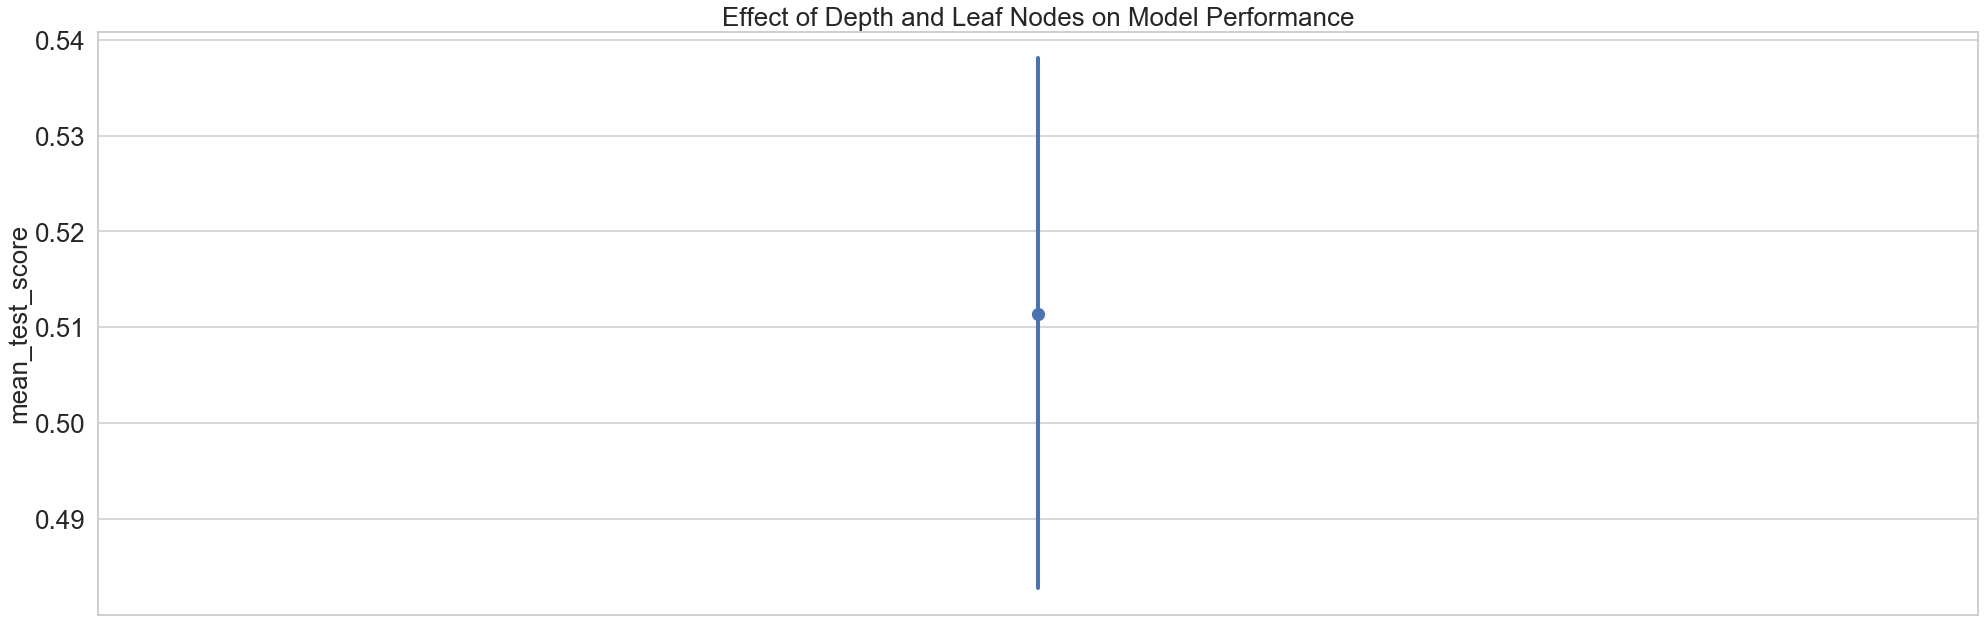

In [56]:
fig,ax = plt.subplots()
sns.pointplot(data=df[['mean_test_score',
                           'param_max_leaf_nodes'
                             ]],
             y='mean_test_score',X='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

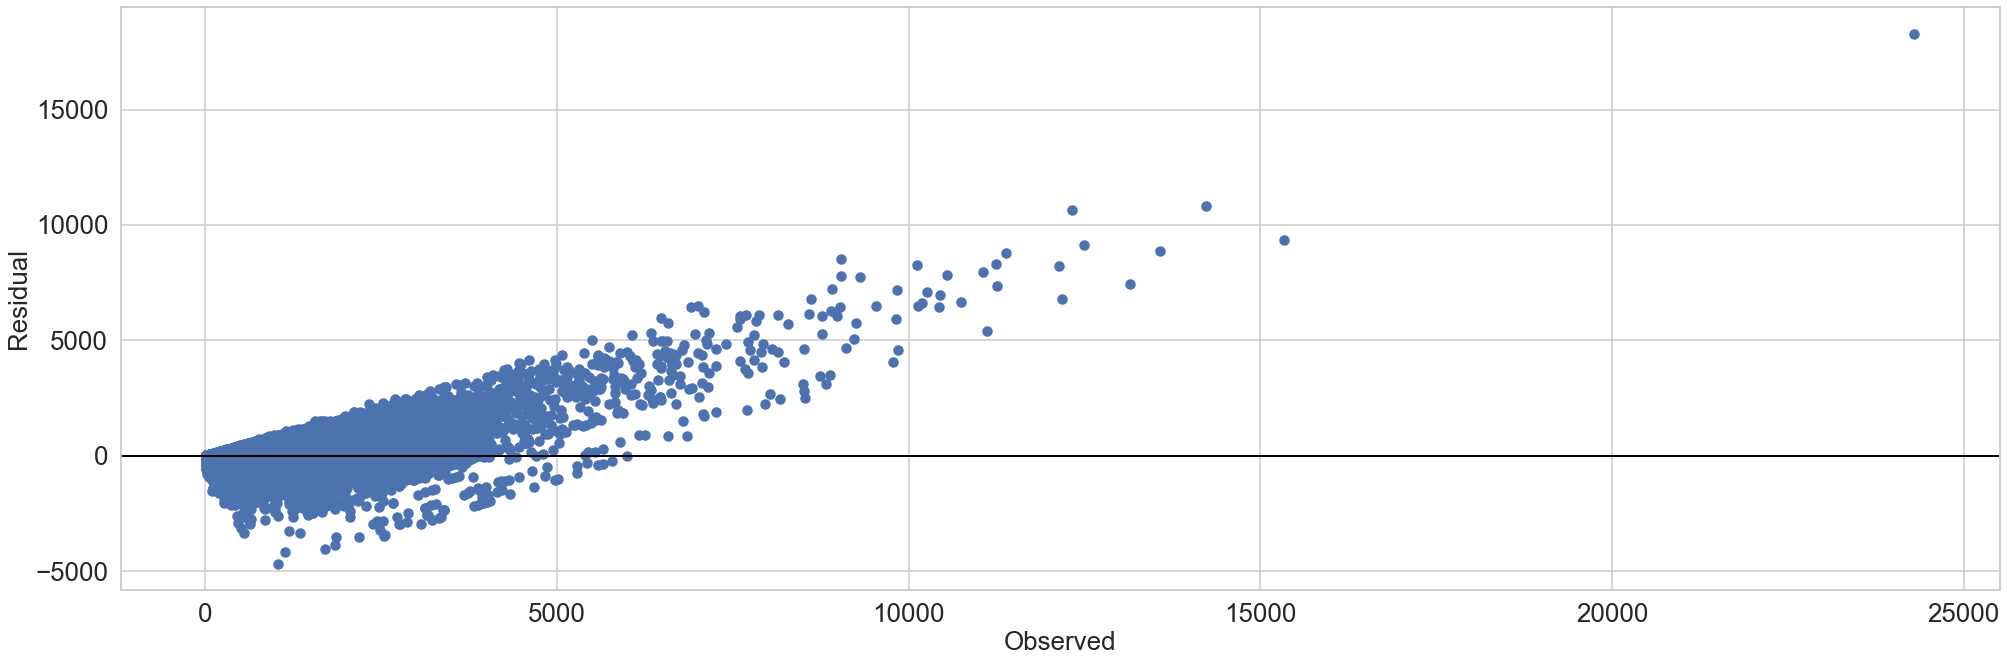

In [57]:

predicted = grid_cv_dtm.best_estimator_.predict(X)
residuals = y.flatten()-predicted

fig, ax = plt.subplots()
ax.scatter(y.flatten(), residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [58]:
r2_scores = cross_val_score(grid_cv_dtm.best_estimator_, X, y, cv=10)
mse_scores = cross_val_score(grid_cv_dtm.best_estimator_, X, y, cv=10,scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))
print("MSE::{:.3f}".format(np.mean(mse_scores)))

avg R-squared::0.402
MSE::-87540.400


In [59]:

grid_cv_dtm.best_estimator_.fit(X_train, y_train)
y_pred = grid_cv_dtm.best_estimator_.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 63.05111517750927


# SUBMISSION

In [66]:
testfinal=pd.merge(test,meal_info,on='meal_id',how="outer")
testfinal=pd.merge(testfinal,center_info,on='center_id',how='outer')

In [67]:
testfinal=testfinal.drop(['meal_id','center_id'],axis=1)

In [68]:
tcols=testfinal.columns.tolist()
tcols

['id',
 'week',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'category',
 'cuisine',
 'city_code',
 'region_code',
 'center_type',
 'op_area']

['city_code', 'region_code', 'center_type', 'op_area']

In [70]:
tcols=tcols[:2]+tcols[8:]+tcols[6:8]+tcols[2:6]
testfinal=testfinal[tcols]

In [71]:

lb1 = LabelEncoder()
testfinal['center_type'] = lb1.fit_transform(testfinal['center_type'])

lb2 = LabelEncoder()
testfinal['category'] = lb1.fit_transform(testfinal['category'])

lb3 = LabelEncoder()
testfinal['cuisine'] = lb1.fit_transform(testfinal['cuisine'])

testfinal.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,647,56,2,2.0,0,3,158.11,159.11,0,0
1,1262649,147,647,56,2,2.0,0,3,159.11,159.11,0,0
2,1453211,149,647,56,2,2.0,0,3,157.14,158.14,0,0
3,1262599,150,647,56,2,2.0,0,3,159.14,157.14,0,0
4,1495848,151,647,56,2,2.0,0,3,160.11,159.11,0,0


In [72]:
X_test=testfinal[features].values

In [78]:
pred=tree.predict(X_test)
pred[pred<0]=0
pred

array([205.26333333, 205.26333333, 205.26333333, ...,  48.92079208,
        48.92079208,  48.92079208])

In [79]:
submit=pd.DataFrame({'id':testfinal['id'],'num_orders':pred})

In [82]:
submit.to_csv('D:/Sunil_M_S/Data Set/Food Demand Forecasting Data Set/submission.csv',index=False)